**Table of contents**<a id='toc0_'></a>    
- [Import Statements](#toc1_1_)    
- [Getting to know your data](#toc2_)    
  - [*Initial exploration*](#toc2_1_)    
  - [*Data validation*](#toc2_2_)    
  - [*Data summarization*](#toc2_3_)    
- [Data cleaning and Imputation](#toc3_)    
  - [*Handling missing values*](#toc3_1_)    
  - [*Analyzing categorical data*](#toc3_2_)    
  - [*Analyzing numerical data*](#toc3_3_)    
  - [*Handling outliers*](#toc3_4_)    
- [Exploring relationships in data](#toc4_)    
  - [*Patterns over time*](#toc4_1_)    
  - [*Correlation*](#toc4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import Statements](#toc0_)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc2_'></a>[Getting to know your data](#toc0_)

### <a id='toc2_1_'></a>[*Initial exploration*](#toc0_)

- Take a quick look at the data with `.head()`

- Take a look at some other informations about the dataframe with `.info()`, `.shape`, `.dtypes()`, `.columns` etc.

- For categorical variables, a common question we might ask ourselves is how many data points do we have for each of the category? This can be done with `.value_counts()`.

- Get a quick overview of the numerical variables with `.describe()`.

- To see how the numerical variables are distributed use a `histogram/kdeplot/boxplot/violinplot/boxenplot`. After you've got a good grip about what the data is about, you can use `jointplot/pairplot` to further understand the relationship between the variables.

In [3]:
unemployment = pd.read_csv("./datasets/clean_unemployment.csv")

In [4]:
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [5]:
unemployment.shape

(182, 15)

In [6]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [7]:
unemployment.continent.value_counts()

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64

In [8]:
unemployment.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


For quick plotting you can use pandas plotting functions like `df.plot(kind='hist')` or `df.plot(kind='box')`. For more advanced plotting, you can use `matplotlib` or `seaborn`.

<Axes: xlabel='2021', ylabel='Count'>

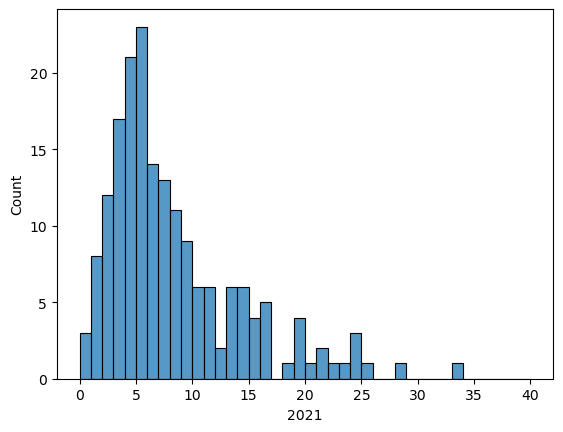

In [9]:
sns.histplot(data=unemployment, x="2021", binrange=(0, 40), binwidth=1)

### <a id='toc2_2_'></a>[*Data validation*](#toc0_)

Data validation is the process of ensuring that the data is clean, correct and useful. It is a good practice to validate the data before you start working on it. This will save you a lot of time and effort in the long run.

- Check the datatypes with `.dtypes` and make sure they are correct. If not, convert them to the correct datatype with `.astype()`.

- For validating categorical variables: to confirm that the categories are as expected use `.unique()` or `.value_counts()`. We can also use `.isin()` to check if the values are in a list of expected values. This can also be used as a filter. We can also use the `~` operator to negate the logic of the filter.

- For validating numerical variables: use `.describe()` to get the summary statistics in a tabular format. We can also draw a `boxplot` to see the summary statistics visually. To select only the numeric columns of a dataframe use, `.select_dtypes("number")`.

<Axes: xlabel='2021', ylabel='continent'>

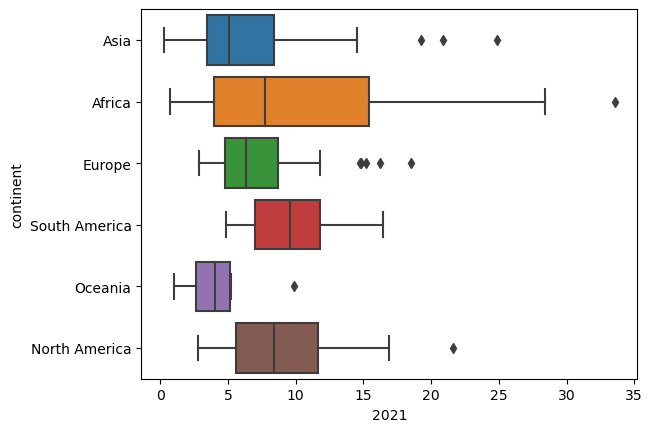

In [10]:
sns.boxplot(data=unemployment, x="2021", y="continent")

### <a id='toc2_3_'></a>[*Data summarization*](#toc0_)

- Use `.groupby()` to group the data and then use `.agg()`/`.transform()`/`.filter()` to summarize and explore the dataset. To visually represent the findings we can use a `barplot`.

## <a id='toc3_'></a>[Data cleaning and Imputation](#toc0_)

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. And, Imputation is the process of replacing missing data with substituted values.

### <a id='toc3_1_'></a>[*Handling missing values*](#toc0_)

- Use `<ser|df>.isna().sum()` to see how many rows have missing values. Use `<ser|df>.isna().mean()` to see the proportion of missing values in each column. To convert to percentage multiply by 100 i.e, `.isna().mean().mul(100)`.

- Strategies for handling missing data
  - Drop the rows with missing values using `<ser|df>.dropna()` if 5% or less of the total observations are missing.
  - Impute the missing values with `mean/median/mode` using `<ser|df>.fillna()` (depending on the distribution and context).
  - Also we can impute the missing values by sub-groups if the trend of the data varies between certain groups.

In [11]:
planes = pd.read_csv("./datasets/planes.csv")

In [12]:
planes.shape

(10660, 11)

In [13]:
planes.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [15]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [16]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [17]:
# we will remove the rows from a column if it has <= 5% of the total rows missing
threshold = len(planes) * 0.05
subset_of_columns_to_remove_rows_from = planes.columns[planes.isna().sum() <= threshold]

In [18]:
planes = planes.dropna(subset=subset_of_columns_to_remove_rows_from)

In [19]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

In [20]:
# The Additional_Info column is of object type. Let's first explore the values and their frequencies in the col
planes["Additional_Info"].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [21]:
# From what we can see the Additional_Info column doesn't contain much useful information. 
# Around 6400 rows still has No info/No Info as the provided information
# So we should just drop the Additional_Info column altogether
planes = planes.drop(columns="Additional_Info")

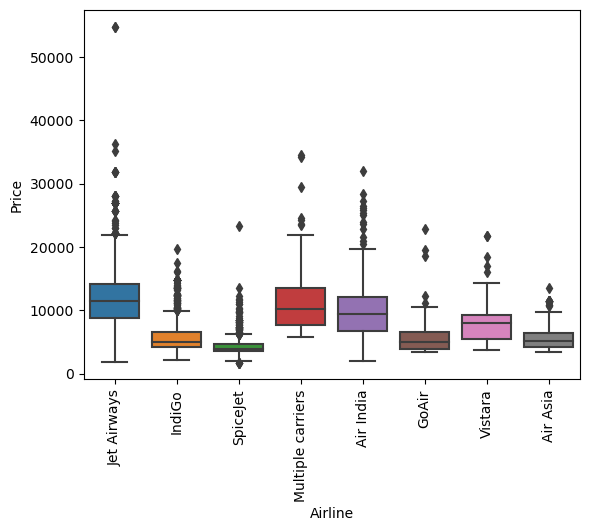

In [22]:
# Let's explore the Price column now.
# It's float64 type. Plotting it's distribution might be helpful.
# Also, the distribution of the price of the tickets are most likely to vary depending on the Airlines.
# We chose to plot a boxplot since it provides 5 summary statistics and also identifies the outliers nicely.
ax = sns.boxplot(data=planes, x="Airline", y="Price")
ax.tick_params("x", rotation=90)

In [23]:
# From the boxplot we can see that indeed the ticket prices vary widely between Airlines and also there are lots
# of outliers for each Airline. If we used mean to impute the missing values then it would not represent the 
# dataset accurately. We should instead use median.
fill_values = planes.groupby("Airline").Price.agg("median").to_dict()
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(fill_values))

In [24]:
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [25]:
# We could've also used, 
# planes = planes.assign(Price=planes.groupby("Airline").Price.transform(lambda grp: grp.fillna(grp.median())))

### <a id='toc3_2_'></a>[*Analyzing categorical data*](#toc0_)

- Select the object columns using `.select_dtypes("object")` and then use `.value_counts()` to see the distribution of the categories. We can also use `.value_counts(normalize=True)` to see the proportions of the categories. If there are too many categories, this might not be very useful. In that case we can use, `.numunique()` to see the number of unique categories and use the `.unique()` method to see the name of those unique categories.

- If the categorical column has comparatively few categories we can covert them to *category* type with `.astype("category")`. For columns with large number of categories, we should try to group them into smaller number of categories with some filtering logics. For filtering the data, functions like `np.select()`, `df.query()`, `df.loc[]`, `df.where()` etc. can be very useful.

In [26]:
planes.select_dtypes("object").nunique()

Airline               8
Date_of_Journey      44
Source                5
Destination           6
Route               122
Dep_Time            218
Arrival_Time       1220
Duration            362
Total_Stops           5
dtype: int64

In [27]:
# The "Airline", "Source", "Destination" columns should be converted to categorical type
# The "Total_Stops" column can be converted to int type or categorical type

In [28]:
planes.Total_Stops.value_counts()

Total_Stops
1 stop      4467
non-stop    2786
2 stops     1219
3 stops       35
4 stops        1
Name: count, dtype: int64

In [29]:
# The "Date_of_Journey", "Dep_Time" and "Arrival_Time" should be converted to datetime objects

In [30]:
planes.Dep_Time.head()

0    09:25
1    18:05
2    16:50
3    09:00
4    18:55
Name: Dep_Time, dtype: object

In [31]:
planes.Arrival_Time.head()

0    04:25 10 Jun
1           23:30
2           21:35
3           11:25
4    10:25 13 Mar
Name: Arrival_Time, dtype: object

In [32]:
# "Duration" should be number type

In [33]:
planes.Duration.head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [34]:
# Looks like this won't be simple to convert to numbers. However for now, we could categorize flights by 
# duration and examine the frequency of different flight lengths

In [35]:
# list of super categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# categorize as short_flights 
# doesn't work with .str.startswith("0h|1h...") so this way (^ for denoting startswith and | for "or")
short_flights_startswith = "^0h|^1h|^2h|^3h|^4h"

# categorize as medium_flights
medium_flights_startswith = "^5h|^6h|^7h|^8h|^9h"

# categorize as long_flights
long_flights_startswith = "10h|11h|12h|13h|14h|15h|16h"

# otherwise "Extreme duration"

In [36]:
# the conditions list to be used with np.select
conditions = [
    (planes["Duration"].str.contains(short_flights_startswith)),
    (planes["Duration"].str.contains(medium_flights_startswith)),
    (planes["Duration"].str.contains(long_flights_startswith))
]

In [37]:
# we use np.select(condlist, choicelist, default) to categorize the flight durations and create a new column
planes["Duration_Category"] = np.select(condlist=conditions, 
                                        choicelist=flight_categories,
                                        default="Extreme duration")

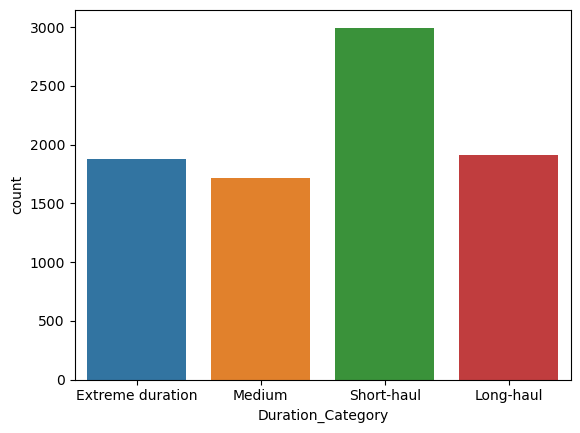

In [38]:
# plot the counts of each super category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

### <a id='toc3_3_'></a>[*Analyzing numerical data*](#toc0_)

- Sometimes there are columns that should be "number" type but are stored as strings or objects. In those cases we can utilize the `.str` accessor to perform string operations on the columns if necessary. Also most of the times the reason is that the data in those columns has some string characters in them (mostly commas ","). In such situations we can use the `.replace()` to replace a string with another or we can also use the `.str.replace()` method to replace a string partially. 

In [39]:
# our Duration column has "h" and "m" in it. let's try to convert them to proper float values
temp_dur = planes.Duration.str.split(" ", expand=True).replace("h", "", regex=True).replace("m", "", regex=True).fillna(0).astype("int")
temp_dur.loc[:, 1] = round(temp_dur.loc[:, 1]/60, 3)
planes["Duration"] = temp_dur.loc[:, 0] + temp_dur.loc[:, 1]

In [40]:
planes.Duration.head()

0    19.000
1     5.417
2     4.750
3     2.417
4    15.500
Name: Duration, dtype: float64

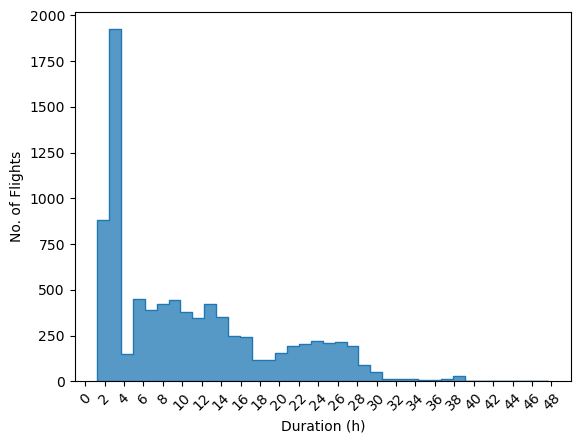

In [41]:
# let's visualize the distribution
ax = sns.histplot(data=planes, x="Duration", element="step")
ax.set_xticks(range(0, 50, 2), range(0, 50, 2), rotation=45)
ax.set(xlabel="Duration (h)", ylabel="No. of Flights")
plt.show()

> *Adding descriptive statistical columns*

- Sometimes we may want to add some columns that describes some properties of the numerical columns such as, median, mean, standard deviation etc. And it is often the case that we want to add these columns for each group of a categorical column. In those cases we can use the `.groupby()` method to group the data, select the columns we want to calculate descriptive statistics for and then use `.transform()` to add the new columns against the original indexes.

In [42]:
# Let's say we want to add a column to planes containing the standard deviation of "Price" based on "Airline"
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda grp: grp.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


### <a id='toc3_4_'></a>[*Handling outliers*](#toc0_)

- Outliers are data points that are significantly different from the remaining data. To identify outliers we first need to calculate the IQR. To find the IQR we can use the `.quantile()` method first to find the 25th and 75th percentile and then, $IQR = Q3 - Q2$. Then we can use the IQR to find the upper and lower bounds of the data. The upper bound is $Q3 + 1.5*IQR$ and the lower bound is $Q1 - 1.5*IQR$. 
- We can use simple boolean logic to see which data points are outliers (e.g, $data < lower \ | \ data > upper$).  

- What to do about the outliers? 
  - Once we know we have outliers, we need to decide what to do. It's helpful to ask ourselves why these outliers exist. For example, plane ticket prices can be very high depending on the class and destination distance. If an airline runs both short and long distance flights then they can have high standard deviation in their ticket prices, so in this case the outliers could be representative of a subset of our data. If this is the case, we could just leave them alone. It can be difficult deciding what to do with outliers, but you must know how to handle them as they often occur in the real-world.

  - Alternatively, do we know the values are accurate? Could there have been an error in data collection? If there's an error, we could remove the values. 
  
  - There are so many other things that we can do. We can just drop the outliers with `.drop()` method or filter out the outliers with simple boolean logic. Or we can clip the values to the upper and lower bounds with `.clip()` method. Or we can replace the outliers with the median value with `.replace()` method. Or we can fill them at first with Nan values and then impute them with the mean/median/mode values/interpolate them if the data is ordered or we can even apply ML algorithms. So there are multitude of possibilities. We need to decide based on our data and the context.

In [43]:
# let's say we want to inspect the Price column for outliers
planes.Price.describe()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64

In [44]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

In [45]:
# See summary statistics for the outliers
planes[(planes["Price"] < lower) | (planes["Price"] > upper)].Price.describe()

count       70.000000
mean     27838.442857
std       5533.992156
min      22794.000000
25%      25735.000000
50%      26890.000000
75%      27992.000000
max      54826.000000
Name: Price, dtype: float64

In [46]:
# Subset the data to remove outliers
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


## <a id='toc4_'></a>[Exploring relationships in data](#toc0_)

### <a id='toc4_1_'></a>[*Patterns over time*](#toc0_)

If the data contains date columns then we should explore whether there are some patterns in the data that emerges over time.

- Either use `pd.to_datetime()` to convert an already existing date column to datetime format or define `parse_dates` parameter while reading the csv file with `pd.read_csv()` method.

- We may want to analyze time data to see if there are some seasonal patterns. We can use `.dt.year`, `.dt.month`, `.dt.day` etc. to extract the year, month, day etc. from the date columns. Then we can use `.groupby()` to group the data by the extracted columns and then use `.agg()` to calculate some descriptive statistics. We can also use `.resample()` to group the data by a certain time period (e.g, month, year etc.) and then use `.agg()` to calculate some descriptive statistics. We can also use `.rolling()` to calculate some rolling statistics (e.g, rolling mean, rolling median etc.) and then plot them to see if there are any patterns (`lineplot` is a good choice for such plots).

In [47]:
divorce = pd.read_csv("./datasets/divorce.csv", parse_dates=["divorce_date", "dob_man", "dob_woman", "marriage_date"])

In [48]:
divorce.shape

(2209, 10)

In [49]:
divorce.columns

Index(['divorce_date', 'dob_man', 'education_man', 'income_man', 'dob_woman',
       'education_woman', 'income_woman', 'marriage_date', 'marriage_duration',
       'num_kids'],
      dtype='object')

In [50]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   datetime64[ns]
 1   dob_man            2209 non-null   datetime64[ns]
 2   education_man      2205 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   datetime64[ns]
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](4), float64(4), object(2)
memory usage: 172.7+ KB


In [51]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


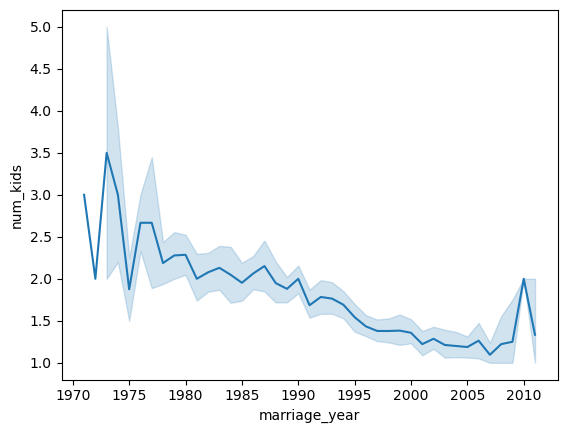

In [52]:
# Let's say we want to know whether the year that a couple got married have a relationship with the 
# number of children that the couple has at the time of divorce?

divorce["marriage_year"] = divorce["marriage_date"].dt.year

# a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

It looks like couples who had later marriage years also had fewer children during their marriage. But we'll need to explore further to gather more evidence before we can say anything conclusive.

### <a id='toc4_2_'></a>[*Correlation (relationship between numerical variables)*](#toc0_)

Covariance is a measure of how much two random variables vary together. The correlation is a normalized measure of covariance. It is used for quantitative measurement of the statistical dependence between two numberical random variables. It describes the direction and strength of relationship between two numrical variables.

- To show the correlation between the numerical variables in a dataframe we can use the `.corr()` method. We can visualize the result with a `heatmap`.
- Note that, the `.corr()` method describes the linear relationship between two variables. It is not a complete measure of correlation. That's why it's always a good idea to plot the data to see the relationship between the variables. To do this we can use `scatterplot, regplot, pairplot` etc. 

In [53]:
divorce.select_dtypes("number").corr()

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


<Axes: >

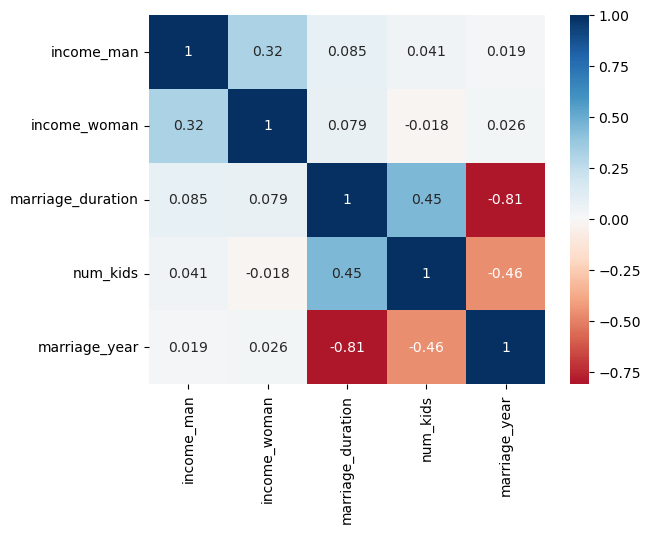

In [54]:
sns.heatmap(divorce.select_dtypes("number").corr(), annot=True, cmap="RdBu", center=0)

In [55]:
divorce.loc[:, ["marriage_duration", "marriage_year", "divorce_date"]].agg(["min", "max"])

,marriage_duration,marriage_year,divorce_date
min,1.0,1970,2000-01-08
max,32.0,2014,2015-11-03


In [56]:
# we can see that, marriage_duration is strongly negatively related to marriage_duration. 
# upon closer inspection we can see that, while marriages were recorded from 1970 but the divorce information
# was collected only for years between 2000 and 2015.
# so, by definition the marriage duration for eary marriages will be higher.
# this is one aspect of correlation analysis that we need to be careful about.
# without proper context the correlation coefficient may insinuate wrong conclusions.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


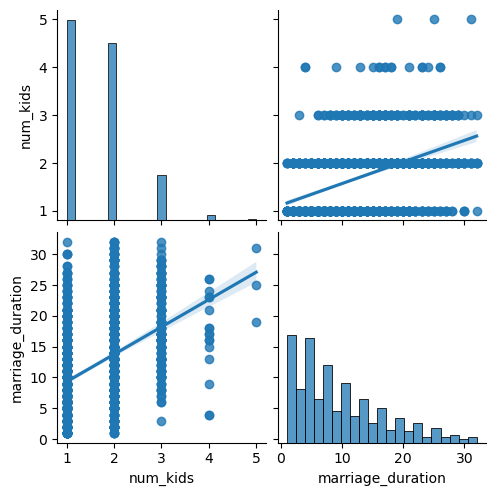

In [57]:
# we can also see that, there is a moderately strong positive relationship between number of kids and 
# marriage duration. let's explore this further.
sns.pairplot(data=divorce, vars=["num_kids", "marriage_duration"], kind="reg")
plt.show()

In [58]:
# we can see that there are no entry for 0 childs i.e, couples with no child.
divorce.num_kids.isna().sum()

876

In [59]:
# if we are sure that these Nan values are for couples with no childs then we can fill them with 0 and 
# calculate the correlation again.

In [60]:
divorce["num_kids"] = divorce.num_kids.fillna(value=0)

In [61]:
divorce.num_kids.isna().sum()

0

In [62]:
divorce.num_kids.value_counts()

num_kids
0.0    876
1.0    621
2.0    550
3.0    142
4.0     17
5.0      3
Name: count, dtype: int64

<Axes: >

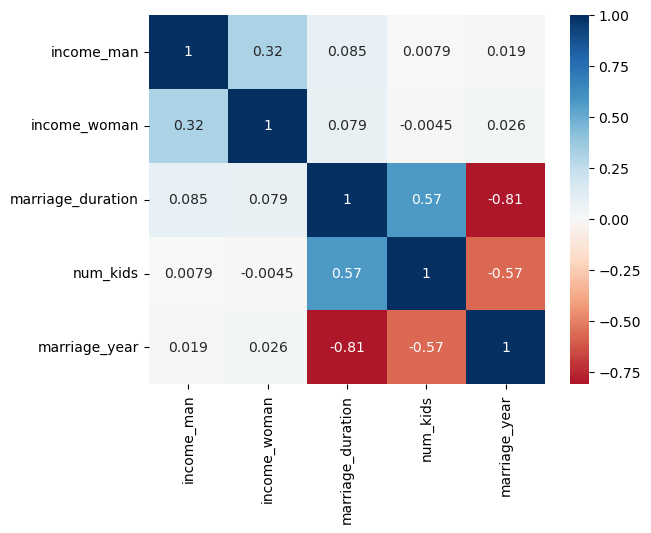

In [63]:
sns.heatmap(divorce.select_dtypes("number").corr(), annot=True, cmap="RdBu", center=0)

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


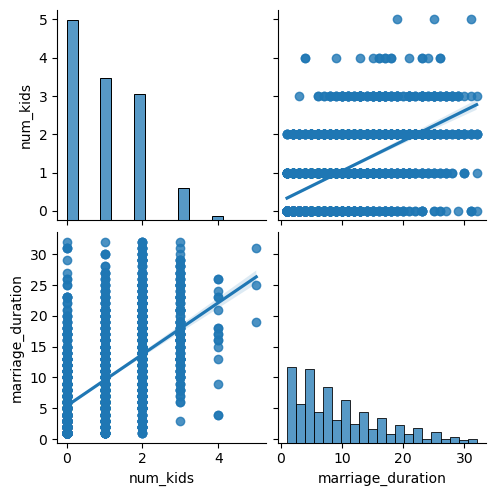

In [64]:
sns.pairplot(data=divorce, vars=["num_kids", "marriage_duration"], kind="reg")

### *Exploring categorical realtionships*

Categorical variables are harder to summarize numerically, so we often rely on visualizations to explore their relationships.

In [65]:
# Let's take a look at how women's education and age at marriage relate to other variables in the divorce dataframe

In [66]:
divorce

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,0.0,2001
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,0.0,2006
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,0.0,2007
...,...,...,...,...,...,...,...,...,...,...,...
2204,2006-10-31,1969-11-27,Professional,6000.0,1975-09-01,Professional,14000.0,2002-03-08,4.0,0.0,2002
2205,2006-10-31,1970-09-17,Professional,6000.0,1977-07-22,Professional,6000.0,2002-03-22,4.0,0.0,2002
2206,2011-10-31,1976-03-11,Professional,8000.0,1978-12-28,Professional,7000.0,2009-02-10,2.0,0.0,2009
2207,2012-10-31,1977-10-29,Professional,12500.0,1978-12-01,Professional,6000.0,2008-10-25,3.0,0.0,2008


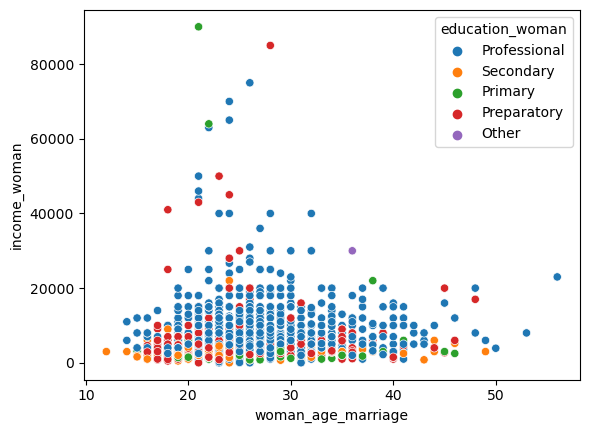

In [70]:
# we can use the hue argument in a scatterplot to view the effect of a categorical variable
# let's explore the relationship between a woman's salary and education level along with 
# the relationship between age of marriage and the education level
divorce["woman_age_marriage"] = divorce["marriage_date"].dt.year - divorce["dob_woman"].dt.year
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman", hue_order=["Professional", "Secondary", "Primary", "Preparatory", "Other"])
plt.show()

In [77]:
# it looks like there is a positive correlation between professional education and higher salaries, as you might expect. 
# The relationship between women's age at marriage and education level is a little less clear. Although most of the women that married after 
# 25 have Professional level education but for the plot it is also evident that most of the observations i.e, womens have professional
# level of education

In [72]:
# say we are interested in the relationship between marriage duration and the number of kids that a couple has. 
# Since values in the num_kids column range only from one to five, we can plot the KDE for each value on the same plot.

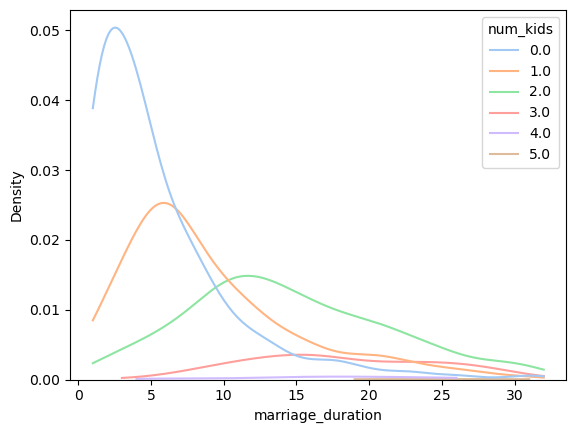

In [76]:
# Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual. 
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, palette="pastel")
plt.show()

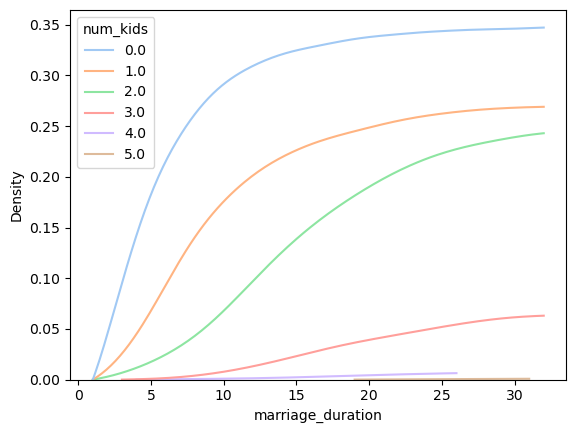

In [78]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, palette="pastel", cumulative=True)
plt.show()

In [79]:
# It looks as though there is a positive correlation between longer marriages and more children,
# but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more 
# than two children; this helps us understand how reliable our findings are.